In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import AffinityPropagation, KMeans

In [2]:
df_orders = pd.read_csv("../data/olist_orders_dataset.csv")
df_orders_item = pd.read_csv("../data/olist_order_items_dataset.csv")
df_product = pd.read_csv("../data/olist_products_dataset.csv")

In [3]:
df = pd.merge(df_orders, df_orders_item, on='order_id')

df_group = df.groupby('customer_id')

In [4]:
# Nombre de produit moyen par commande
df_group['product_id'].count().mean()

1.1417306873695092

In [5]:
df_group_item = df_orders_item.groupby('order_id')
print('Mean', df_group_item['product_id'].count().mean())
print('Median', df_group_item['product_id'].count().median())
print('Min', df_group_item['product_id'].count().min())
print('Max', df_group_item['product_id'].count().max())

Mean 1.1417306873695092
Median 1.0
Min 1
Max 21


<AxesSubplot:ylabel='Frequency'>

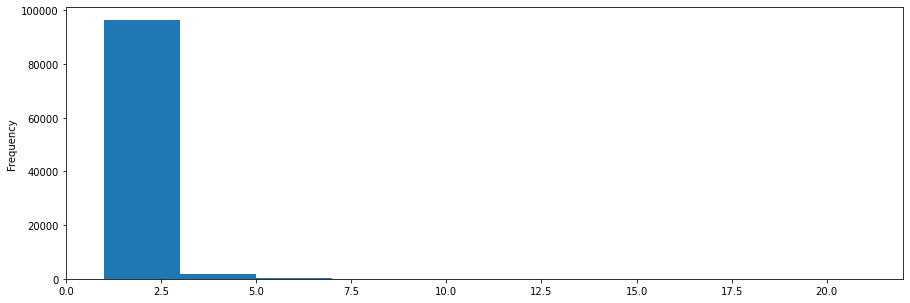

In [6]:
df_group_item['product_id'].count().plot(kind='hist', figsize=(15,5))

In [7]:
df_orders.loc[df_orders.duplicated(subset=['customer_id'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [8]:
len(df_orders['customer_id'].unique())

99441

In [9]:
df = pd.merge(df, df_product, on='product_id')
df.to_csv('../data/merged_order.csv')

In [10]:
category = df['product_category_name'].unique()

In [11]:
df_cat = df.groupby('customer_id')['product_category_name'].value_counts().unstack(fill_value=0)

In [31]:
df_cat.to_csv('../data/aa.csv')

In [32]:
y_pred = KMeans(random_state=5, n_clusters=60).fit_predict(df_cat)


In [44]:
cluster_df = pd.DataFrame(data={'customer_id': df_cat.index, 'cluster': y_pred})
full_df = pd.merge(df, cluster_df, on='customer_id')

In [47]:
full_df.to_csv('../data/full_clustered.csv')